<a href="https://colab.research.google.com/github/xslittlemaggie/Deep-Learning-Projects/blob/master/MNIST_CNN_%E5%8F%82%E6%95%B0%E8%B0%83%E8%8A%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import SGD, adam, RMSprop

from keras.utils import np_utils
from keras import backend as K

# visualization
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [0]:
# the data, split between train and test sets
if K.image_data_format() == "channels_first":
  x_train = x_train.reshape(x_train.shape[0], 1, 28, 28)
  x_test = x_test.reshape(x_test.shape[0], 1, 28, 28)
  input_shape = (1, 28, 28)
else:
  x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
  x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
  input_shape = (28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#x_train = x_train/255
#x_test = x_test/255

# convert class vectors to binary class matrics
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [4]:
model = Sequential()

# 第一层: CNN
model.add(Conv2D(32, kernel_size = (3, 3), input_shape = (28, 28, 1)))

# 第二层：激活层
model.add(Activation("sigmoid"))

# 第三层：池化层
model.add(MaxPooling2D(2, 2))


# 将图片拉平
model.add(Flatten())
model.add(Dense(10, activation = "softmax"))

model.compile(loss = 'mse', optimizer = adam(), metrics = ["accuracy"]) # categorical_crossentropy

model.summary()






Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                54090     
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [28]:
history = model.fit(x_train, y_train, 
                   batch_size = 128, 
                   epochs = 30,
                   validation_data = (x_test, y_test))
score = model.evaluate(x_train, y_train)
print("Train score: {}".format(score[1]))


score = model.evaluate(x_test, y_test)
print("Test score: {}".format(score[1]))

Train on 60000 samples, validate on 10000 samples
Epoch 1/130
60000/60000 [==============================] - 4s 65us/step - loss: 0.0761 - acc: 0.4297 - val_loss: 0.0670 - val_acc: 0.4876
Epoch 2/130
60000/60000 [==============================] - 4s 59us/step - loss: 0.0660 - acc: 0.4902 - val_loss: 0.0652 - val_acc: 0.4936
Epoch 3/130
60000/60000 [==============================] - 4s 59us/step - loss: 0.0651 - acc: 0.4932 - val_loss: 0.0650 - val_acc: 0.4955
Epoch 4/130
60000/60000 [==============================] - 4s 61us/step - loss: 0.0648 - acc: 0.4941 - val_loss: 0.0661 - val_acc: 0.4946
Epoch 5/130
60000/60000 [==============================] - 4s 59us/step - loss: 0.0647 - acc: 0.4948 - val_loss: 0.0638 - val_acc: 0.4967
Epoch 6/130
60000/60000 [==============================] - 4s 60us/step - loss: 0.0642 - acc: 0.4961 - val_loss: 0.0640 - val_acc: 0.4960
Epoch 7/130
60000/60000 [==============================] - 4s 60us/step - loss: 0.0643 - acc: 0.4964 - val_loss: 0.0643 - 

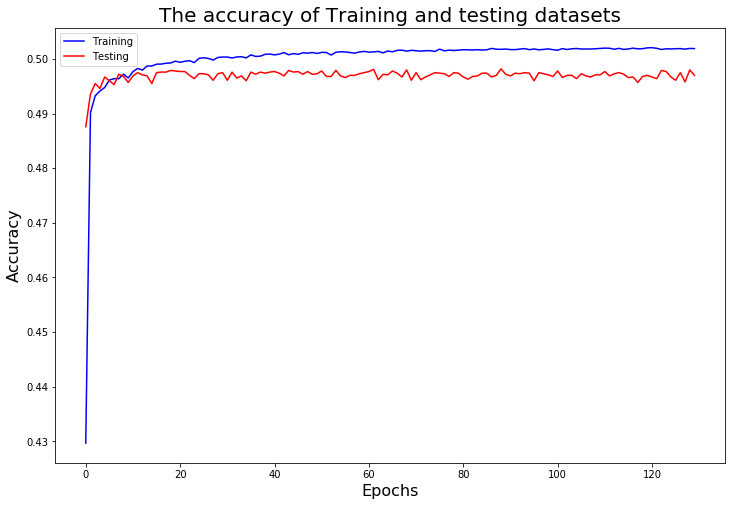

In [32]:
plt.figure(figsize = (12, 8))
plt.plot(history.history["acc"], color = "b")
plt.plot(history.history["val_acc"], color = "r")
plt.title("The accuracy of Training and testing datasets", size = 20)
plt.xlabel("Epochs", size = 16)
plt.ylabel("Accuracy", size = 16)
plt.legend(["Training","Testing"])
plt.show()

# 参数调节

## 调参 1. 增加网络的深度

In [5]:
model = Sequential()

for i in range(10):
  # 第一层: CNN
  model.add(Conv2D(32, kernel_size = (3, 3), input_shape = (28, 28, 1)))

  # 第二层：激活层
  model.add(Activation("sigmoid"))

# 第三层：池化层
model.add(MaxPooling2D(2, 2))

# 将图片拉平
model.add(Flatten())
model.add(Dense(10, activation = "softmax"))

model.compile(loss = 'mse', optimizer = adam(), metrics = ["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_2 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_3 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
activation_4 (Activation)    (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 20, 20, 32)       

In [6]:
history = model.fit(x_train, y_train, 
                   batch_size = 128, 
                   epochs = 30,
                   validation_data = (x_test, y_test))
score = model.evaluate(x_train, y_train)
print("Train score: {}".format(score[1]))


score = model.evaluate(x_test, y_test)
print("Test score: {}".format(score[1]))



Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 21s 356us/step - loss: 0.0901 - acc: 0.1066 - val_loss: 0.0900 - val_acc: 0.1135
Epoch 2/30
60000/60000 [==============================] - 14s 241us/step - loss: 0.0900 - acc: 0.1121 - val_loss: 0.0900 - val_acc: 0.1135
Epoch 3/30
60000/60000 [==============================] - 14s 240us/step - loss: 0.0900 - acc: 0.1124 - val_loss: 0.0900 - val_acc: 0.1135
Epoch 4/30
60000/60000 [==============================] - 14s 241us/step - loss: 0.0900 - acc: 0.1124 - val_loss: 0.0900 - val_acc: 0.1135
Epoch 5/30
60000/60000 [==============================] - 14s 241us/step - loss: 0.0900 - acc: 0.1124 - val_loss: 0.0900 - val_acc: 0.1135
Epoch 6/30
60000/60000 [==============================] - 14s 241us/step - loss: 0.0900 - acc: 0.1124 - val_loss: 0.0900 - val_acc: 0.1135
Epoch 7/30
60000/60000 [==============================] - 14s 240us/step - loss: 0.0900 - acc: 0.1124 - val_loss: 

In [0]:
max(history.history["val_acc"])

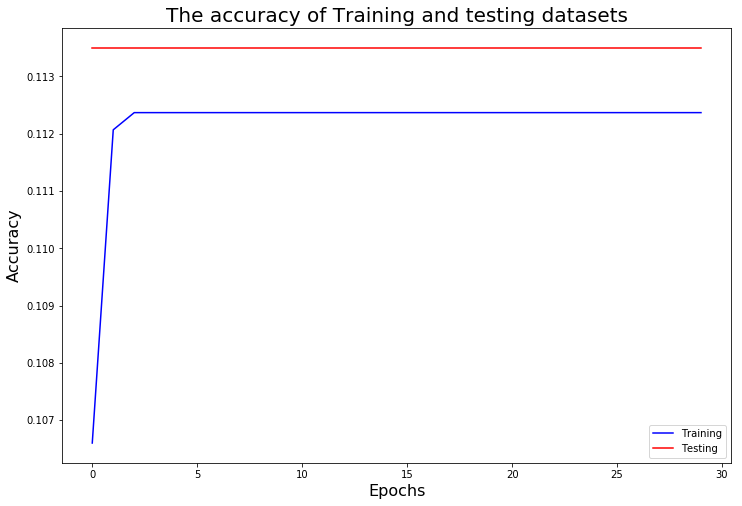

In [7]:
plt.figure(figsize = (12, 8))
plt.plot(history.history["acc"], color = "b")
plt.plot(history.history["val_acc"], color = "r")
plt.title("The accuracy of Training and testing datasets", size = 20)
plt.xlabel("Epochs", size = 16)
plt.ylabel("Accuracy", size = 16)
plt.legend(["Training","Testing"])
plt.show()

## 调参 2. 数据归一化

In [0]:
x_train = x_train/255
x_test = x_test/255

In [10]:
model = Sequential()

# 第一层: CNN
model.add(Conv2D(32, kernel_size = (3, 3), input_shape = (28, 28, 1)))

# 第二层：激活层
model.add(Activation("sigmoid"))

# 第三层：池化层
model.add(MaxPooling2D(2, 2))

# 将图片拉平
model.add(Flatten())
model.add(Dense(10, activation = "softmax"))

model.compile(loss = 'mse', optimizer = adam(), metrics = ["accuracy"])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_22 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                54090     
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(x_train, y_train, 
                   batch_size = 128, 
                   epochs = 30,
                   validation_data = (x_test, y_test))
score = model.evaluate(x_train, y_train)
print("Train score: {}".format(score[1]))


score = model.evaluate(x_test, y_test)
print("Test score: {}".format(score[1]))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 4s 66us/step - loss: 0.0833 - acc: 0.3432 - val_loss: 0.0671 - val_acc: 0.5116
Epoch 2/30
60000/60000 [==============================] - 4s 59us/step - loss: 0.0652 - acc: 0.5173 - val_loss: 0.0645 - val_acc: 0.5257
Epoch 3/30
60000/60000 [==============================] - 4s 60us/step - loss: 0.0631 - acc: 0.5295 - val_loss: 0.0608 - val_acc: 0.5410
Epoch 4/30
60000/60000 [==============================] - 4s 60us/step - loss: 0.0618 - acc: 0.5364 - val_loss: 0.0600 - val_acc: 0.5429
Epoch 5/30
60000/60000 [==============================] - 4s 60us/step - loss: 0.0601 - acc: 0.5444 - val_loss: 0.0580 - val_acc: 0.5563
Epoch 6/30
60000/60000 [==============================] - 4s 59us/step - loss: 0.0591 - acc: 0.5501 - val_loss: 0.0570 - val_acc: 0.5613
Epoch 7/30
60000/60000 [==============================] - 4s 60us/step - loss: 0.0583 - acc: 0.5546 - val_loss: 0.0575 - val_acc

In [0]:
max(history.history["val_acc"])

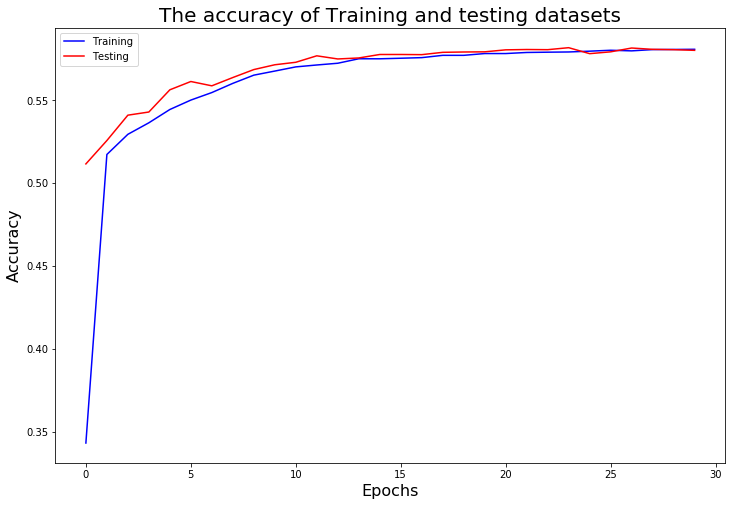

In [12]:
plt.figure(figsize = (12, 8))
plt.plot(history.history["acc"], color = "b")
plt.plot(history.history["val_acc"], color = "r")
plt.title("The accuracy of Training and testing datasets", size = 20)
plt.xlabel("Epochs", size = 16)
plt.ylabel("Accuracy", size = 16)
plt.legend(["Training","Testing"])
plt.show()

## 调参 3: 激励函数 

In [13]:
model = Sequential()

# 第一层: CNN
model.add(Conv2D(32, kernel_size = (3, 3), input_shape = (28, 28, 1)))

# 第二层：激活层
model.add(Activation("relu"))

# 第三层：池化层
model.add(MaxPooling2D(2, 2))

# 将图片拉平
model.add(Flatten())
model.add(Dense(10, activation = "softmax"))

model.compile(loss = 'mse', optimizer = adam(), metrics = ["accuracy"])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_23 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                54090     
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model.fit(x_train, y_train, 
                   batch_size = 128, 
                   epochs = 30,
                   validation_data = (x_test, y_test))
score = model.evaluate(x_train, y_train)
print("Train score: {}".format(score[1]))


score = model.evaluate(x_test, y_test)
print("Test score: {}".format(score[1]))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 4s 66us/step - loss: 0.0159 - acc: 0.8986 - val_loss: 0.0086 - val_acc: 0.9441
Epoch 2/30
60000/60000 [==============================] - 4s 60us/step - loss: 0.0064 - acc: 0.9607 - val_loss: 0.0049 - val_acc: 0.9700
Epoch 3/30
60000/60000 [==============================] - 4s 60us/step - loss: 0.0044 - acc: 0.9740 - val_loss: 0.0047 - val_acc: 0.9713
Epoch 4/30
60000/60000 [==============================] - 4s 60us/step - loss: 0.0035 - acc: 0.9792 - val_loss: 0.0036 - val_acc: 0.9761
Epoch 5/30
60000/60000 [==============================] - 4s 60us/step - loss: 0.0030 - acc: 0.9824 - val_loss: 0.0032 - val_acc: 0.9793
Epoch 6/30
60000/60000 [==============================] - 4s 61us/step - loss: 0.0026 - acc: 0.9843 - val_loss: 0.0033 - val_acc: 0.9781
Epoch 7/30
60000/60000 [==============================] - 4s 60us/step - loss: 0.0025 - acc: 0.9855 - val_loss: 0.0030 - val_acc

In [0]:
max(history.history["val_acc"])

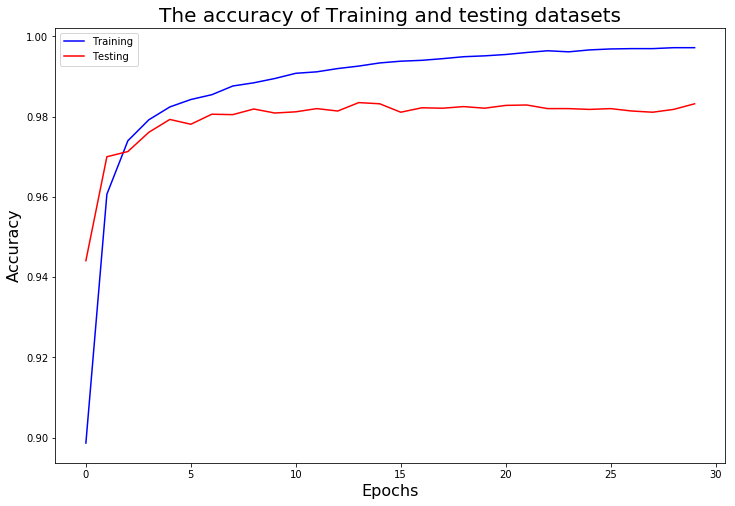

In [15]:
plt.figure(figsize = (12, 8))
plt.plot(history.history["acc"], color = "b")
plt.plot(history.history["val_acc"], color = "r")
plt.title("The accuracy of Training and testing datasets", size = 20)
plt.xlabel("Epochs", size = 16)
plt.ylabel("Accuracy", size = 16)
plt.legend(["Training","Testing"])
plt.show()

## 调参 4: 目标函数

In [16]:
model = Sequential()

# 第一层: CNN
model.add(Conv2D(32, kernel_size = (3, 3), input_shape = (28, 28, 1)))

# 第二层：激活层
model.add(Activation("relu"))

# 第三层：池化层
model.add(MaxPooling2D(2, 2))

# 将图片拉平
model.add(Flatten())
model.add(Dense(10, activation = "softmax"))

model.compile(loss = 'categorical_crossentropy', optimizer = adam(), metrics = ["accuracy"])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_24 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                54090     
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model.fit(x_train, y_train, 
                   batch_size = 128, 
                   epochs = 30,
                   validation_data = (x_test, y_test))
score = model.evaluate(x_train, y_train)
print("Train score: {}".format(score[1]))


score = model.evaluate(x_test, y_test)
print("Test score: {}".format(score[1]))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 4s 71us/step - loss: 0.3582 - acc: 0.9022 - val_loss: 0.1610 - val_acc: 0.9558
Epoch 2/30
60000/60000 [==============================] - 4s 63us/step - loss: 0.1309 - acc: 0.9642 - val_loss: 0.0983 - val_acc: 0.9717
Epoch 3/30
60000/60000 [==============================] - 4s 62us/step - loss: 0.0884 - acc: 0.9759 - val_loss: 0.0753 - val_acc: 0.9769
Epoch 4/30
60000/60000 [==============================] - 4s 64us/step - loss: 0.0710 - acc: 0.9801 - val_loss: 0.0664 - val_acc: 0.9793
Epoch 5/30
60000/60000 [==============================] - 4s 63us/step - loss: 0.0616 - acc: 0.9821 - val_loss: 0.0597 - val_acc: 0.9808
Epoch 6/30
60000/60000 [==============================] - 4s 63us/step - loss: 0.0545 - acc: 0.9842 - val_loss: 0.0574 - val_acc: 0.9810
Epoch 7/30
60000/60000 [==========

In [0]:
max(history.history["val_acc"])

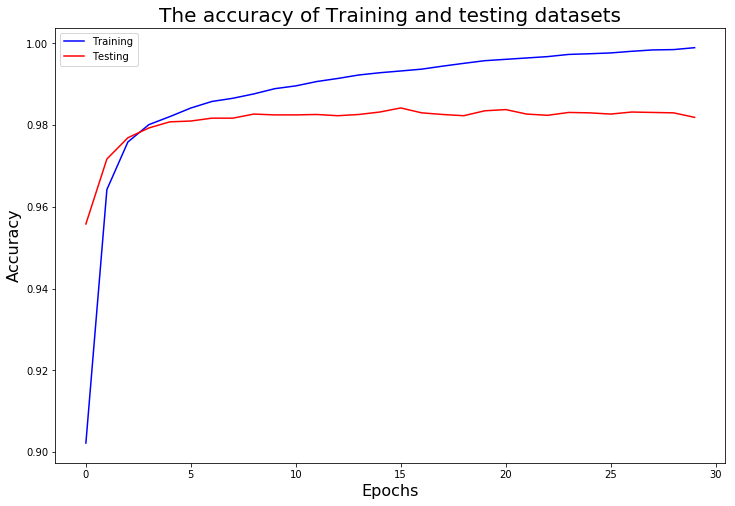

In [18]:
plt.figure(figsize = (12, 8))
plt.plot(history.history["acc"], color = "b")
plt.plot(history.history["val_acc"], color = "r")
plt.title("The accuracy of Training and testing datasets", size = 20)
plt.xlabel("Epochs", size = 16)
plt.ylabel("Accuracy", size = 16)
plt.legend(["Training","Testing"])
plt.show()

## 调参 5: 优化函数

In [0]:
model = Sequential()

# 第一层: CNN
model.add(Conv2D(32, kernel_size = (3, 3), input_shape = (28, 28, 1)))

# 第二层：激活层
model.add(Activation("relu"))

# 第三层：池化层
model.add(MaxPooling2D(2, 2))

# 将图片拉平
model.add(Flatten())
model.add(Dense(10, activation = "softmax"))

model.compile(loss = 'categorical_crossentropy', optimizer = adam(), metrics = ["accuracy"])
model.summary()

In [0]:
history = model.fit(x_train, y_train, 
                   batch_size = 128, 
                   epochs = 30,
                   validation_data = (x_test, y_test))
score = model.evaluate(x_train, y_train)
print("Train score: {}".format(score[1]))


score = model.evaluate(x_test, y_test)
print("Test score: {}".format(score[1]))

In [0]:
plt.figure(figsize = (12, 8))
plt.plot(history.history["acc"], color = "b")
plt.plot(history.history["val_acc"], color = "r")
plt.title("The accuracy of Training and testing datasets", size = 20)
plt.xlabel("Epochs", size = 16)
plt.ylabel("Accuracy", size = 16)
plt.legend(["Training","Testing"])
plt.show()

## 调参 6: 批归一化（BN）

In [22]:
from keras.layers.normalization import BatchNormalization

model = Sequential()

# 第一层: CNN
model.add(Conv2D(32, kernel_size = (3, 3), input_shape = (28, 28, 1)))
model.add(BatchNormalization())
# 第二层：激活层
model.add(Activation("relu"))

# 第三层：池化层
model.add(MaxPooling2D(2, 2))

# 将图片拉平
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(10, activation = "softmax"))

model.compile(loss = 'categorical_crossentropy', optimizer = adam(), metrics = ["accuracy"])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_2 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
activation_26 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 5408)              0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 5408)              21632     
_________________________________________________________________
dense_8 (Dense)              (None, 10)              

In [23]:
history = model.fit(x_train, y_train, 
                   batch_size = 128, 
                   epochs = 30,
                   validation_data = (x_test, y_test))
score = model.evaluate(x_train, y_train)
print("Train score: {}".format(score[1]))


score = model.evaluate(x_test, y_test)
print("Test score: {}".format(score[1]))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 7s 116us/step - loss: 0.1809 - acc: 0.9468 - val_loss: 0.1299 - val_acc: 0.9609
Epoch 2/30
60000/60000 [==============================] - 6s 103us/step - loss: 0.0754 - acc: 0.9775 - val_loss: 0.1241 - val_acc: 0.9644
Epoch 3/30
60000/60000 [==============================] - 6s 101us/step - loss: 0.0542 - acc: 0.9837 - val_loss: 0.1337 - val_acc: 0.9645
Epoch 4/30
60000/60000 [==============================] - 6s 100us/step - loss: 0.0424 - acc: 0.9866 - val_loss: 0.0852 - val_acc: 0.9765
Epoch 5/30
60000/60000 [==============================] - 6s 100us/step - loss: 0.0345 - acc: 0.9887 - val_loss: 0.1147 - val_acc: 0.9703
Epoch 6/30
60000/60000 [==============================] - 6s 103us/step - loss: 0.0279 - acc: 0.9907 - val_loss: 0.1316 - val_acc: 0.9684
Epoch 7/30
60000/60000 [==============================] - 6s 105us/step - loss: 0.0246 - acc: 0.9921 - val_loss: 0.1087 - 

In [0]:
max(history.history["val_acc"])

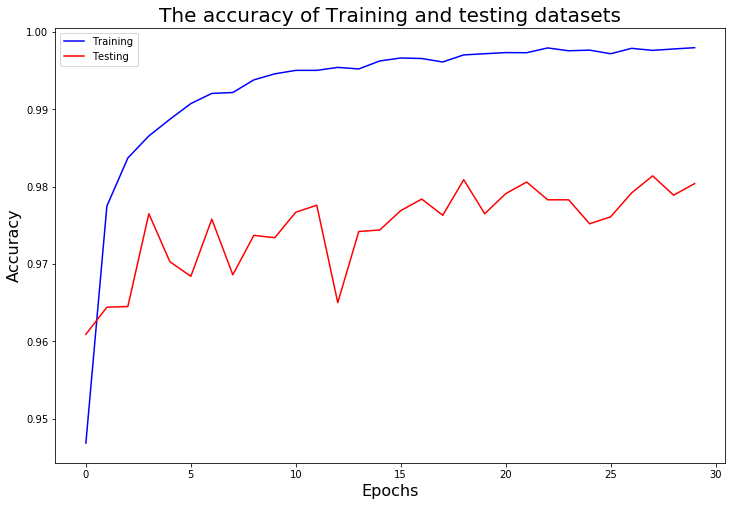

In [24]:
plt.figure(figsize = (12, 8))
plt.plot(history.history["acc"], color = "b")
plt.plot(history.history["val_acc"], color = "r")
plt.title("The accuracy of Training and testing datasets", size = 20)
plt.xlabel("Epochs", size = 16)
plt.ylabel("Accuracy", size = 16)
plt.legend(["Training","Testing"])
plt.show()

## 调参 7：Dropout

In [25]:
model = Sequential()

# 第一层: CNN
model.add(Conv2D(32, kernel_size = (3, 3), input_shape = (28, 28, 1)))
model.add(BatchNormalization())
# 第二层：激活层
model.add(Activation("relu"))

# 第三层：池化层
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.5))

# 将图片拉平
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(10, activation = "softmax"))

model.compile(loss = 'categorical_crossentropy', optimizer = adam(), metrics = ["accuracy"])
model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_4 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
activation_27 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 5408)              0         
____

In [26]:
history = model.fit(x_train, y_train, 
                   batch_size = 128, 
                   epochs = 30,
                   validation_data = (x_test, y_test))
score = model.evaluate(x_train, y_train)
print("Train score: {}".format(score[1]))


score = model.evaluate(x_test, y_test)
print("Test score: {}".format(score[1]))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 8s 125us/step - loss: 0.2948 - acc: 0.9103 - val_loss: 0.1051 - val_acc: 0.9695
Epoch 2/30
60000/60000 [==============================] - 6s 102us/step - loss: 0.1322 - acc: 0.9591 - val_loss: 0.0799 - val_acc: 0.9756
Epoch 3/30
60000/60000 [==============================] - 6s 101us/step - loss: 0.1058 - acc: 0.9683 - val_loss: 0.0760 - val_acc: 0.9787
Epoch 4/30
60000/60000 [==============================] - 6s 100us/step - loss: 0.0949 - acc: 0.9712 - val_loss: 0.0908 - val_acc: 0.9749
Epoch 5/30
60000/60000 [==============================] - 6s 102us/step - loss: 0.0876 - acc: 0.9731 - val_loss: 0.0645 - val_acc: 0.9810
Epoch 6/30
60000/60000 [==============================] - 6s 102us/step - loss: 0.0804 - acc: 0.9751 - val_loss: 0.0665 - val_acc: 0.9810
Epoch 7/30
60000/60000 [==============================] - 6s 102us/step - loss: 0.0799 - acc: 0.9754 - val_loss: 0.0674 - 

In [0]:
max(history.history["val_acc"])

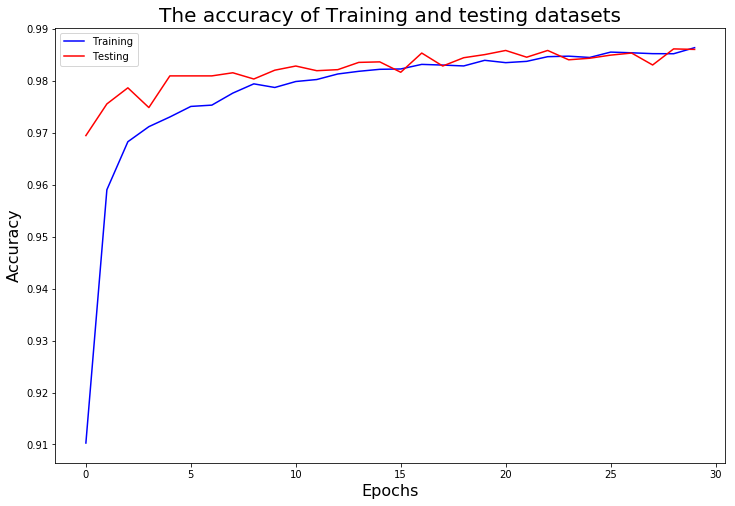

In [27]:
plt.figure(figsize = (12, 8))
plt.plot(history.history["acc"], color = "b")
plt.plot(history.history["val_acc"], color = "r")
plt.title("The accuracy of Training and testing datasets", size = 20)
plt.xlabel("Epochs", size = 16)
plt.ylabel("Accuracy", size = 16)
plt.legend(["Training","Testing"])
plt.show()

## 调参 8： 卷积核个数， 大小

In [28]:
model = Sequential()

# 第一层: CNN
model.add(Conv2D(64, kernel_size = (3, 3), input_shape = (28, 28, 1)))
model.add(BatchNormalization())
# 第二层：激活层
model.add(Activation("relu"))

# 第一层: CNN
model.add(Conv2D(64, kernel_size = (3, 3)))
model.add(BatchNormalization())
# 第二层：激活层
model.add(Activation("relu"))

# 第二层：激活层
# 第一层: CNN
model.add(Conv2D(32, kernel_size = (3, 3)))
model.add(BatchNormalization())


# 第二层：激活层
model.add(Activation("relu"))

# 第三层：池化层
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.5))

# 将图片拉平
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(10, activation = "softmax"))

model.compile(loss = 'categorical_crossentropy', optimizer = adam(), metrics = ["accuracy"])
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
batch_normalization_6 (Batch (None, 26, 26, 64)        256       
_________________________________________________________________
activation_28 (Activation)   (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 24, 24, 64)        36928     
_________________________________________________________________
batch_normalization_7 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
activation_29 (Activation)   (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 22, 22, 32)      

In [29]:
history = model.fit(x_train, y_train, 
                   batch_size = 128, 
                   epochs = 30,
                   validation_data = (x_test, y_test))
score = model.evaluate(x_train, y_train)
print("Train score: {}".format(score[1]))


score = model.evaluate(x_test, y_test)
print("Test score: {}".format(score[1]))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 18s 306us/step - loss: 0.1830 - acc: 0.9438 - val_loss: 0.0521 - val_acc: 0.9828
Epoch 2/30
60000/60000 [==============================] - 17s 278us/step - loss: 0.0745 - acc: 0.9773 - val_loss: 0.0502 - val_acc: 0.9840
Epoch 3/30
60000/60000 [==============================] - 17s 277us/step - loss: 0.0622 - acc: 0.9813 - val_loss: 0.0444 - val_acc: 0.9858
Epoch 4/30
60000/60000 [==============================] - 17s 277us/step - loss: 0.0569 - acc: 0.9827 - val_loss: 0.0455 - val_acc: 0.9867
Epoch 5/30
60000/60000 [==============================] - 17s 278us/step - loss: 0.0479 - acc: 0.9858 - val_loss: 0.0612 - val_acc: 0.9836
Epoch 6/30
60000/60000 [==============================] - 17s 277us/step - loss: 0.0512 - acc: 0.9848 - val_loss: 0.0433 - val_acc: 0.9872
Epoch 7/30
60000/60000 [==============================] - 17s 278us/step - loss: 0.0458 - acc: 0.9870 - val_loss: 0.

In [0]:
max(history.history["val_acc"])

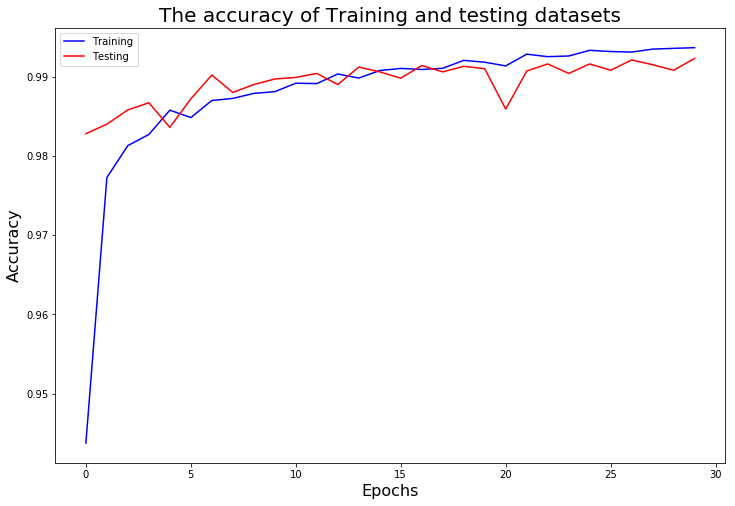

In [30]:
plt.figure(figsize = (12, 8))
plt.plot(history.history["acc"], color = "b")
plt.plot(history.history["val_acc"], color = "r")
plt.title("The accuracy of Training and testing datasets", size = 20)
plt.xlabel("Epochs", size = 16)
plt.ylabel("Accuracy", size = 16)
plt.legend(["Training","Testing"])
plt.show()

## 调参 9： batch size

In [39]:
model = Sequential()

# 第一层: CNN
model.add(Conv2D(64, kernel_size = (3, 3), input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(Activation("relu"))


model.add(Conv2D(64, kernel_size = (3, 3)))
model.add(BatchNormalization())
model.add(Activation("relu"))


model.add(Conv2D(32, kernel_size = (3, 3)))
model.add(BatchNormalization())
model.add(Activation("relu"))

#池化层
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.5))

# 将图片拉平
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(10, activation = "softmax"))

model.compile(loss = 'categorical_crossentropy', optimizer = adam(), metrics = ["accuracy"])
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
batch_normalization_14 (Batc (None, 26, 26, 64)        256       
_________________________________________________________________
activation_34 (Activation)   (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 24, 24, 64)        36928     
_________________________________________________________________
batch_normalization_15 (Batc (None, 24, 24, 64)        256       
_________________________________________________________________
activation_35 (Activation)   (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 22, 22, 32)      

In [40]:
history = model.fit(x_train, y_train, 
                   batch_size = 64, 
                   epochs = 100,
                   validation_data = (x_test, y_test))
score = model.evaluate(x_train, y_train)
print("Train score: {}".format(score[1]))


score = model.evaluate(x_test, y_test)
print("Test score: {}".format(score[1]))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 25s 415us/step - loss: 0.1834 - acc: 0.9438 - val_loss: 0.0689 - val_acc: 0.9797
Epoch 2/100
60000/60000 [==============================] - 23s 382us/step - loss: 0.0963 - acc: 0.9723 - val_loss: 0.0520 - val_acc: 0.9846
Epoch 3/100
60000/60000 [==============================] - 23s 382us/step - loss: 0.0835 - acc: 0.9766 - val_loss: 0.0570 - val_acc: 0.9838
Epoch 4/100
60000/60000 [==============================] - 23s 380us/step - loss: 0.0767 - acc: 0.9793 - val_loss: 0.0488 - val_acc: 0.9873
Epoch 5/100
60000/60000 [==============================] - 23s 381us/step - loss: 0.0709 - acc: 0.9810 - val_loss: 0.0460 - val_acc: 0.9884
Epoch 6/100
60000/60000 [==============================] - 23s 384us/step - loss: 0.0701 - acc: 0.9824 - val_loss: 0.0588 - val_acc: 0.9867
Epoch 7/100
60000/60000 [==============================] - 23s 382us/step - loss: 0.0659 - acc: 0.9833 - val_l

In [42]:
max(history.history["val_acc"])

0.9935

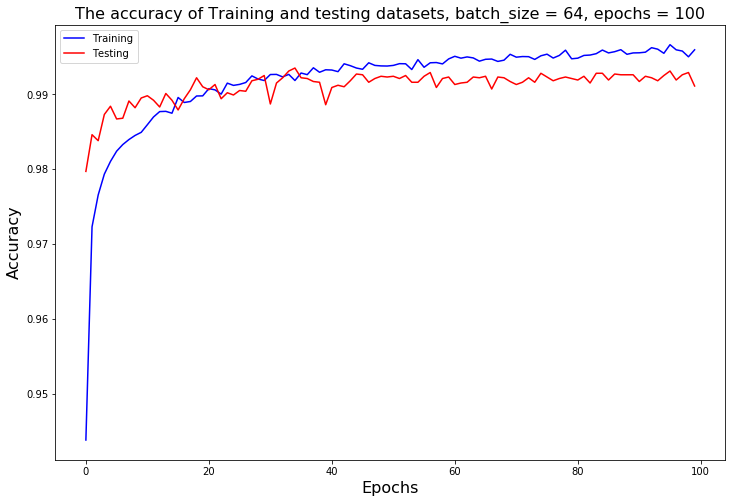

In [43]:
plt.figure(figsize = (12, 8))
plt.plot(history.history["acc"], color = "b")
plt.plot(history.history["val_acc"], color = "r")
plt.title("The accuracy of Training and testing datasets, batch_size = 64, epochs = 100", size = 16)
plt.xlabel("Epochs", size = 16)
plt.ylabel("Accuracy", size = 16)
plt.legend(["Training","Testing"])
plt.show()

In [116]:

model = Sequential()
#model.add(Dense(units = input_shape = (28, 28, 1)))
model.add(Dense(10, input_dim=784, activation='sigmoid'))
model.compile(loss = 'mean_squared_error', optimizer = adam(), metrics = ["accuracy"]) # 'sgd'
#SGD(lr=0.01, momentum=0.9, nesterov=True)
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [0]:
x_train_new = x_train[:].reshape((-1, 28 * 28))
y_train_new = y_train[:]
x_test_new = x_test[:].reshape((-1, 28 * 28))
y_test_new = y_test[:]

In [122]:

history = model.fit(x_train_new, y_train_new, 
                   batch_size = 64, 
                   epochs = 20,
                   validation_data = (x_test_new, y_test_new))
score = model.evaluate(x_train_new, y_train_new)
print("Train score: {}".format(score[1]))


score = model.evaluate(x_test_new, y_test_new)
print("Test score: {}".format(score[1]))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.0162 - acc: 0.9180 - val_loss: 0.0265 - val_acc: 0.8872
Epoch 2/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.0159 - acc: 0.9191 - val_loss: 0.0303 - val_acc: 0.8888
Epoch 3/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.0156 - acc: 0.9212 - val_loss: 0.0336 - val_acc: 0.8834
Epoch 4/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.0154 - acc: 0.9221 - val_loss: 0.0341 - val_acc: 0.8824
Epoch 5/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.0152 - acc: 0.9222 - val_loss: 0.0350 - val_acc: 0.8828
Epoch 6/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.0151 - acc: 0.9237 - val_loss: 0.0409 - val_acc: 0.8760
Epoch 7/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.0150 - acc: 0.9240 - val_loss: 0.0410 - val_acc

In [0]:
weights, bias = model.get_weights()

In [124]:
weights.shape

(784, 10)

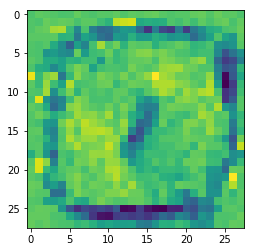

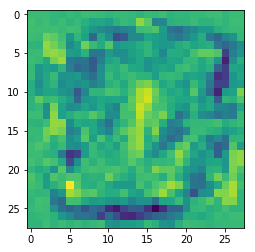

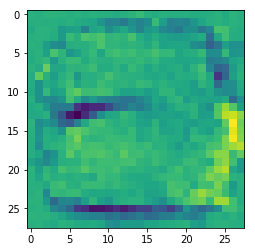

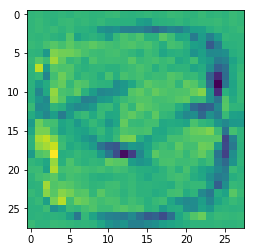

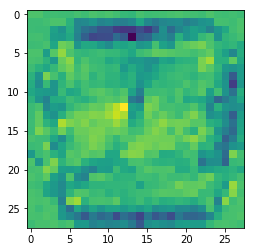

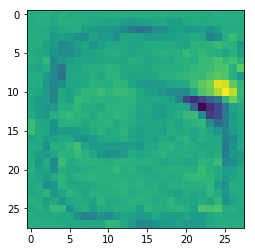

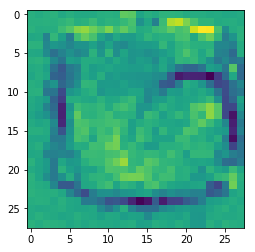

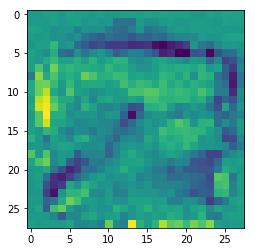

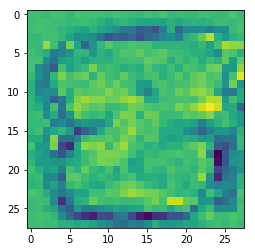

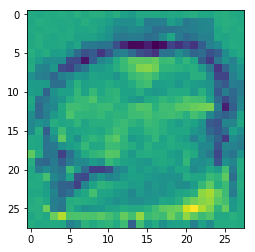

In [125]:
for i in range(10):
  plt.imshow(weights[:, i].reshape(28, 28))
  plt.show()